# **Projeto 01** - Análise de Estatística Descritiva

- Usar técnicas de mineração de dados e extração de informação, como cáluclos de relevância de palavras
- Aplicar etiquetas morfossintáticas às palavras do corpus
- Além de implementar esses métodos em Python, levantar elementos que permitam discutir criticamente os resultados obtidos.

## Passo 1. Verificando o conteúdo do Corpus Machado e extraindo

In [1]:
import nltk
from nltk.corpus import machado

nltk.download('machado')

[nltk_data] Downloading package machado to /root/nltk_data...


True

In [2]:
import zipfile
caminho = '/root/nltk_data/corpora/machado.zip'
arquivo_zip = zipfile.ZipFile(caminho, 'r')

arquivo_zip.printdir()


File Name                                             Modified             Size
machado/                                       2009-11-07 17:15:34            0
machado/CONTENTS                               2009-11-07 17:01:42         7414
machado/contos/                                2009-11-07 00:29:12            0
machado/contos/macn001.txt                     2009-11-07 00:27:08       325777
machado/contos/macn002.txt                     2009-11-07 00:27:08       263696
machado/contos/macn003.txt                     2009-11-07 00:27:10       319473
machado/contos/macn004.txt                     2009-11-07 00:27:10       294593
machado/contos/macn005.txt                     2009-11-07 00:27:10       253555
machado/contos/macn006.txt                     2009-11-07 00:27:10       130664
machado/contos/macn007.txt                     2009-11-07 00:27:12       169880
machado/contos/macn008.txt                     2009-11-07 00:27:12         3936
machado/contos/macn009.txt              

In [3]:
# extrair conteúdo para análise
import os

pasta_destino = '/root/nltk_data/corpora/'

os.makedirs(pasta_destino, exist_ok=True)

arquivo_zip.extractall(pasta_destino)

print(f"Arquivos extraídos para {pasta_destino}")

Arquivos extraídos para /root/nltk_data/corpora/


## Passo 2 - Etiquetação Morfológica (POS tagging)

In [4]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 17.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
import spacy
nlp = spacy.load('pt_core_news_sm')

doc = nlp('Vamos estudar Processamento de linguagem natural')

etiq = [(x.orth_, x.pos_) for x in doc]
print(etiq)

[('Vamos', 'AUX'), ('estudar', 'VERB'), ('Processamento', 'PROPN'), ('de', 'ADP'), ('linguagem', 'NOUN'), ('natural', 'ADJ')]


In [15]:
# Função para leitura dos arquivos a serem utilizados
def ler(nome_arquivo):
  arquivo = open(nome_arquivo, 'r', encoding='ISO-8859-1')
  conteudo_arq = arquivo.read()
  arquivo.close()
  return conteudo_arq

In [13]:
#Obtenção do caminho dos arquivos para serem analisados

obras = []
for i in range(1, 6):
  obras.append('/root/nltk_data/corpora/machado/romance/marm0'+str(i)+'.txt')

for i in range(1, 6):
  obras.append('/root/nltk_data/corpora/machado/cronica/macr0'+str(i)+'.txt')

In [24]:
import statistics as stat

cont_adv = []

for obra in obras:
  print(obra)
  s = ler(obra)

  doc = nlp(s)
  etiq = [(x.orth_, x.pos_) for x in doc]
  adv = [(ort,pos) for (ort,pos) in etiq if pos == "ADV"]
  cont_adv.append(len(adv)/len(etiq))

print(cont_adv)

/root/nltk_data/corpora/machado/romance/marm01.txt
/root/nltk_data/corpora/machado/romance/marm02.txt
/root/nltk_data/corpora/machado/romance/marm03.txt
/root/nltk_data/corpora/machado/romance/marm04.txt
/root/nltk_data/corpora/machado/romance/marm05.txt
/root/nltk_data/corpora/machado/cronica/macr01.txt
/root/nltk_data/corpora/machado/cronica/macr02.txt
/root/nltk_data/corpora/machado/cronica/macr03.txt
/root/nltk_data/corpora/machado/cronica/macr04.txt
/root/nltk_data/corpora/machado/cronica/macr05.txt
[0.06059252642548757, 0.06217443568852678, 0.05392558824755737, 0.060081142081723646, 0.05774050146712507, 0.04643839583031707, 0.04072243346007605, 0.0439109341957955, 0.046125480153649166, 0.04610318331503842]


In [26]:
rom_m = stat.mean(cont_adv[:4])
rom_dp = stat.stdev(cont_adv[:4])
cron_m = stat.mean(cont_adv[:5])
cron_dp = stat.stdev(cont_adv[:5])

## Passo 03 - Geração de Gráfico para demonstração de resultados

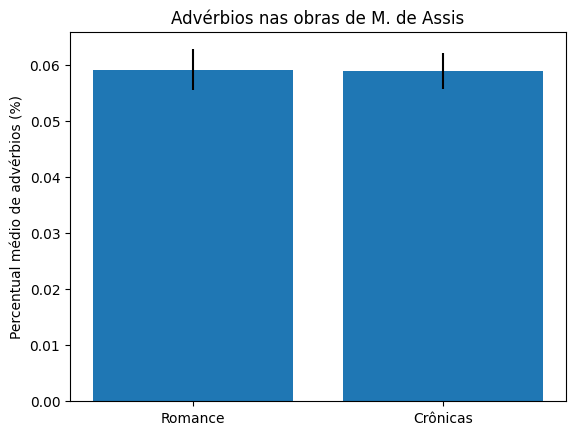

In [34]:
import matplotlib.pyplot as plt

tipo_obra = ["Romance", "Crônicas"]

x = [0,1]
y = [rom_m, cron_m]
dp = [rom_dp, cron_dp]

plt.bar(x, y, yerr=dp)
plt.xticks(x, tipo_obra)
plt.ylabel('Percentual médio de advérbios (%)')
plt.title('Advérbios nas obras de M. de Assis')
plt.show()

## Passo 4 - Análise da classe gramaticais

In [31]:
# limpeza para classificação

lixo = ['PUNCT', 'SPACE', 'SYM', 'X', 'NUM']
pos2 = [pos for (pal,pos) in etiq if pos not in lixo]

In [32]:
from collections import defaultdict

cont = defaultdict(int)
for p in pos2:
  cont[p] += 1

nomes = cont.keys()
ocorrencias = cont.values()

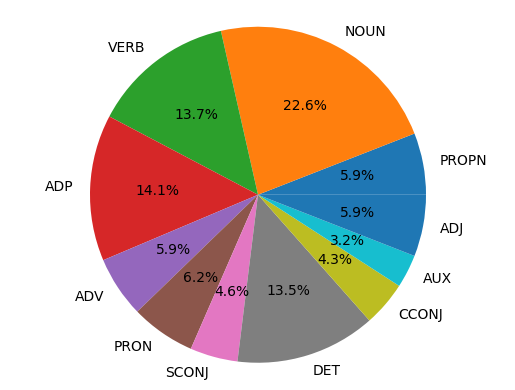

In [33]:
plt.pie(ocorrencias, labels=nomes, autopct='%1.1f%%')
plt.axis('equal')

plt.show()